In [3]:
text = "This is a sample text string. We're just going to play around with this text."

def count_words(text):
    """Counts the number of times each word appears in a string.
    Returns a dictionary where keys are words and the values are word counts."""
    
    counts = {}
    text = text.lower()
    skips = [".", ",", "'", ":", ";", '"']
    for i in skips:
        text = text.replace(i, "")
    for word in text.split(" "):
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
        
    return counts

count_words(text);

In [4]:
from collections import Counter

def count_words_fast(text):
    """Counts the number of times each word appears in a string.
    Returns a dictionary where keys are words and the values are word counts."""
    
    text = text.lower()
    skips = [".", ",", "'", ":", ";", '"']
    for i in skips:
        text = text.replace(i, "")
        
        
    counts = Counter(text.split(" "))
        
    return counts

count_words_fast(text) == count_words(text)

len(count_words("This comprehension check is to check for comprehension."))

6

In [6]:
def read_book(title_path):
    """Read a book and return it as a string"""
    with open(title_path, "r", encoding="utf-8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
        return text

romeo_juliet = "./Books_EngFr/Books_EngFr/English/shakespeare/Romeo and Juliet.txt"
romeo_juliet_german = "./Books_GerPort/Books_GerPort/German/shakespeare/Romeo und Julia.txt"

text = read_book(romeo_juliet)
text_g = read_book(romeo_juliet_german)

index = text.find("What's in a name?")
print(index)

sample_text = text[index : index + 1000]
sample_text;

42757


In [17]:
def word_stats(word_counts):
    """Returns number of unique words and word frequencies."""
    num_unique = len(word_counts)
    counts = word_counts.values()
    return(num_unique, counts)

word_counts = count_words(text)
num_unique, counts = word_stats(word_counts)
num_unique



5118

In [46]:
import pandas as pd
table = pd.DataFrame(columns = ("name", "age"))
table.loc[1] = "James", 22
table.loc[2] = "Jesss", 32

table.columns
table

,name,age
1,James,22
2,Jesss,32


In [50]:
import os

book_dir = "./Books"

#print(os.listdir(book_dir))
stats = pd.DataFrame(columns = ("Language", "Author", "Title", "Length", "Unique"))
title_num = 1
for language in os.listdir(book_dir):
    for author in os.listdir(book_dir + "/" + language):
        for title in os.listdir(book_dir + "/" + language + "/" + author):
            inputfile = book_dir + "/" + language + "/" + author + "/" + title
            #print(inputfile)
            text = read_book(inputfile)
            (num_unique, counts) = word_stats(count_words_fast(text))
            stats.loc[title_num] = language, author.capitalize(), title.replace(".txt", ""), sum(counts), num_unique
            title_num += 1
            

stats.tail()

,Language,Author,Title,Length,Unique
98,English,Shakespeare,Richard III,48315,5449
99,English,Shakespeare,Othello,26590,5898
100,English,Shakespeare,Hamlet,28551,6776
101,English,Shakespeare,Macbeth,16874,4780
102,English,Shakespeare,The Merchant of Venice,20949,4978


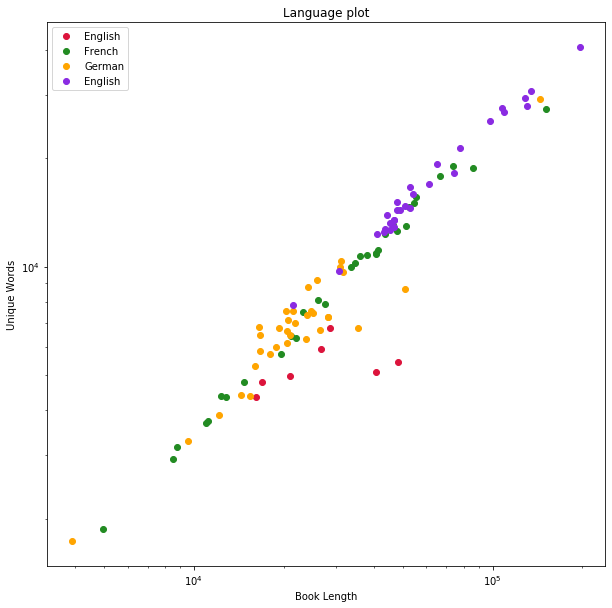

In [75]:
import matplotlib.pyplot as plt

#print(stats.Length)

#plt.plot(stats.Length, stats.Unique, "bo");
#plt.loglog(stats.Length, stats.Unique, "bo");

stats[stats.Language == "English"]
stats[stats.Language == "French"]


plt.figure(figsize = (10, 10))

subset = stats[stats.Language == "English"]
plt.loglog(subset.Length, subset.Unique, "o", label = "English", color = "crimson")

subset = stats[stats.Language == "French"]
plt.loglog(subset.Length, subset.Unique, "o", label = "French", color = "forestgreen")

subset = stats[stats.Language == "German"]
plt.loglog(subset.Length, subset.Unique, "o", label = "German", color = "orange")

subset = stats[stats.Language == "Portuguese"]
plt.loglog(subset.Length, subset.Unique, "o", label = "English", color = "blueviolet")

plt.legend()
plt.title("Language plot")
plt.xlabel("Book Length")
plt.ylabel("Unique Words")
plt.savefig("lang_plot.pdf")

In [76]:
stats[stats.Language == "French"]

,Language,Author,Title,Length,Unique
64,French,Sand,La Marquise,14716,4786
65,French,Sand,L' Orco,8748,3162
66,French,Sand,Jacques le fataliste et son maåtre,85756,18744
67,French,Sand,cora,12370,4370
68,French,Sand,La Coupe; Lupo Liverani; Le Toast; Garnier; Le...,47831,12540
69,French,Sand,Le poâme de Myrza,12771,4348
70,French,Sand,Pauline,27486,7901
71,French,Sand,Mattea,21089,6429
72,French,Sand,Metella,19600,5715
73,French,Sand,Oeuvres illustrÇes de George Sand,23210,7503
